First we install MaBoSS

In [8]:
import maboss

In [25]:
model_invasion = maboss.load("models/metastasis.bnd", "models/metastasis.cfg")

In [26]:
res_invasion = model_invasion.run()

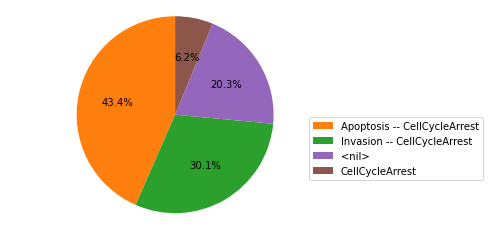

In [27]:
res_invasion.plot_piechart()

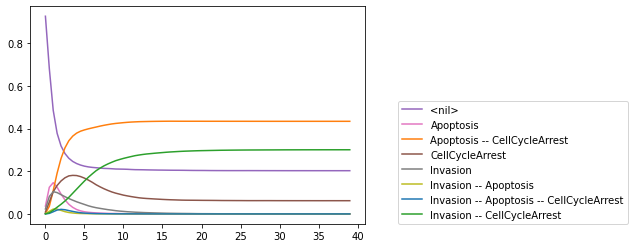

In [28]:
res_invasion.plot_trajectory()

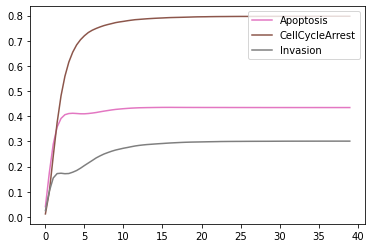

In [29]:
res_invasion.plot_node_trajectory()

In [41]:
table = res_invasion.get_states_probtraj()
table

,<nil>,Apoptosis,Apoptosis -- CellCycleArrest,CellCycleArrest,Invasion,Invasion -- Apoptosis,Invasion -- Apoptosis -- CellCycleArrest,Invasion -- CellCycleArrest
0.0,0.927211,0.036734,0.002495,0.008816,0.023224,0.001194,0.000086,0.000240
0.5,0.682001,0.124939,0.035559,0.056035,0.081564,0.012353,0.002428,0.005121
1.0,0.485872,0.146506,0.109373,0.103834,0.104372,0.022607,0.010071,0.017365
1.5,0.378143,0.124966,0.191455,0.133481,0.100016,0.022513,0.018048,0.031378
2.0,0.318932,0.093268,0.259885,0.154564,0.090280,0.016553,0.021432,0.045086
...,...,...,...,...,...,...,...,...
37.0,0.202716,0.000000,0.434370,0.061996,0.000007,0.000000,0.000000,0.300912
37.5,0.202720,0.000000,0.434370,0.061987,0.000010,0.000000,0.000000,0.300913
38.0,0.202716,0.000000,0.434370,0.061990,0.000004,0.000000,0.000000,0.300920
38.5,0.202714,0.000000,0.434370,0.061996,0.000000,0.000000,0.000000,0.300920


<AxesSubplot:>

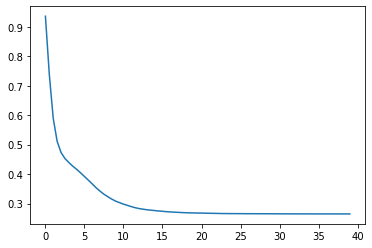

In [46]:
(table["<nil>"]+table["CellCycleArrest"]).plot()

In [47]:
no_ecm_no_dd = model_invasion.copy()

In [65]:
help(no_ecm_no_dd.network.set_istate)

Help on method set_istate in module maboss.network:

set_istate(nodes, probDict, warnings=True) method of maboss.network.Network instance
    Change the inital states probability of one or several nodes.
    
    :param nodes: the node(s) whose initial states are to be modified
    :type nodes: a :py:class:`Node` or a list or tuple of :py:class:`Node`
    :param dict probDict: the probability distribution of intial states
    
    If nodes is a Node object or a singleton, probDict must be a probability
    distribution over {0, 1}, it can be expressed by a list [P(0), P(1)] or a
    dictionary: {0: P(0), 1: P(1)}.
    
    If nodes is a tuple or a list of several Node objects, the Node object 
    will be bound, and probDict must be a probability distribution over a part
    of {0, 1}^n. It must be expressed in the form of a dictionary
    {(b1, ..., bn): P(b1,..,bn),...}. States that do not appear in the 
    dictionary will be considered to be impossible. If a state has a 0 probabili

In [66]:
no_ecm_no_dd.network.set_istate('ECMicroenv', [1, 0])
no_ecm_no_dd.network.set_istate('DNAdamage', [1, 0])

In [67]:
res_no_ecm_no_dd = no_ecm_no_dd.run()

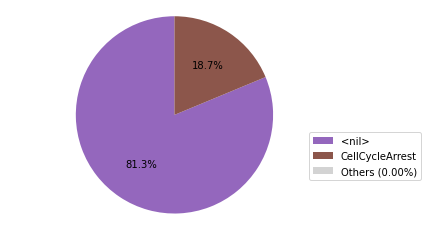

In [68]:
res_no_ecm_no_dd.plot_piechart()

In [69]:
ecm_no_dd = model_invasion.copy()

In [70]:
ecm_no_dd.network.set_istate('ECMicroenv', [0, 1])
ecm_no_dd.network.set_istate('DNAdamage', [1, 0])

In [71]:
res_ecm_no_dd = ecm_no_dd.run()

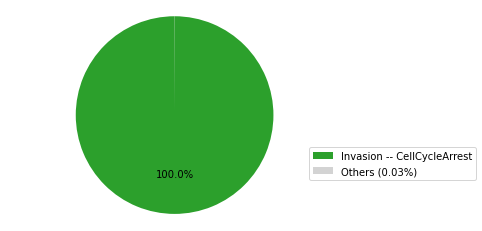

In [73]:
res_ecm_no_dd.plot_piechart()

In [74]:
ecm_dd = model_invasion.copy()

In [75]:
ecm_dd.network.set_istate('ECMicroenv', [0, 1])
ecm_dd.network.set_istate('DNAdamage', [0, 1])

In [76]:
res_ecm_dd = ecm_dd.run()

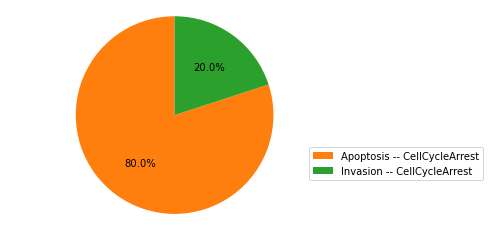

In [77]:
res_ecm_dd.plot_piechart()

In [30]:
mutant_invasion = model_invasion.copy()

In [31]:
help(mutant_invasion.mutate)

Help on method mutate in module maboss.simulation:

mutate(node, state) method of maboss.simulation.Simulation instance
    Trigger or untrigger mutation for a node.
    
    :param node: The :py:class:`Node` to be modified
    :type node: :py:class:`Node`
    :param str State:
    
        * ``'ON'`` (always up)
        * ``'OFF'`` (always down)
        * ``'WT'`` (mutable but with normal behaviour)
    
    
    The node will appear as a mutable node in the bnd file.
    This means that its rate will be of the form:
    
    ``rate_up = $LowNode ? 0 :($HighNode ? 1: (@logic ? rt_up : 0))``
    
    If the node is already mutable, this method will simply set $HighNode
    and $LowNode accordingly to the desired mutation.



In [32]:
mutant_invasion.network.keys()

odict_keys(['ECMicroenv', 'DNAdamage', 'Metastasis', 'Migration', 'Invasion', 'EMT', 'Apoptosis', 'CellCycleArrest', 'GF', 'TGFbeta', 'p21', 'CDH1', 'CDH2', 'VIM', 'TWIST1', 'SNAI1', 'SNAI2', 'ZEB1', 'ZEB2', 'AKT1', 'DKK1', 'CTNNB1', 'NICD', 'p63', 'p53', 'p73', 'miR200', 'miR203', 'miR34', 'AKT2', 'ERK', 'SMAD'])

In [36]:
mutant_invasion.mutate('NICD', 'ON')
mutant_invasion.mutate('p53', 'OFF')

In [37]:
res_mutant_invasion = mutant_invasion.run()

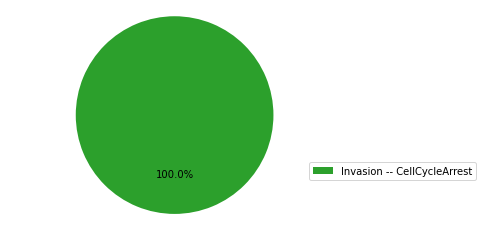

In [38]:
res_mutant_invasion.plot_piechart()